In [2]:
import ROOT as rt
import root_numpy as rtnp
import csv
import re
import sys
import uproot
import numpy as np
import awkward
import math
import numba

from matplotlib import pyplot as plt
sys.path.append('/home/maojiajing/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, std_color_list
from array import array
from prettytable import PrettyTable
import collections
from collections import OrderedDict
import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

# donotdelete = []


Welcome to JupyROOT 6.17/01


In [3]:


# out_dir = '/home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/'
# directory = '/home/maojiajing/cms-llp/samples/bkg/20190430QCD/'
directory = '/home/maojiajing/cms-llp/samples/bkg/20190506QCD/'
out_dir = '/home/maojiajing/cernbox/www/Phase2L1/JetTiming0506/'
#name_string = 'QCD_HT1000to1500_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
name_string1 = 'QCD_'
name_string2 = '_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'

HT = 'HT50toInf'

fpath = directory + name_string1 + HT + name_string2
print HT, fpath
    
print 'File ready'
 

root_dir = uproot.open(fpath) 
# wzNEvents = root_dir['wzNEvents']
NEvents = root_dir['NEvents']
trig = root_dir['trig']
trig_lepId = root_dir['trig_lepId']
trig_lepId_dijet = root_dir['trig_lepId_dijet']

tree = root_dir['JetTimingTree']
# tree = root_dir['vH']
a = tree["jetPt"].array()
print HT, tree,(a[:-1][0])

    

HT50toInf /home/maojiajing/cms-llp/samples/bkg/20190506QCD/QCD_HT50toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root
File ready
HT50toInf <TTree 'JetTimingTree' at 0x7fe05a2e4d10> [335.2933   280.46545  254.46889  237.2423    54.091663  35.85074 ]


In [ ]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

jetTime = tree['jetTime'].array()
weight = tree['weight'].array()
t = jetTime[:,0]
ht0 = create_TH1D( t, axis_title=['jetTime [ns]', 'fraction of events'], name=HT, binning=[50,-5,5],weights = weight)
ht0.SetLineColor(std_color_list[i])
ht0.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht0,HT)
leg.SetBorderSize(0)

ht0.DrawNormalized('')
  
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetTime_leading.png')
c.SaveAs(out_dir+'JetTime_leading.pdf')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/maojiajing/.local/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/home/maojiajing/.local/lib/python2.7/site-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "/home/maojiajing/.local/lib/python2.7/site-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/usr/lib/python2.7/inspect.py", line 1051, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/usr/lib/python2.7/inspect.py", line 1011, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/usr/lib/python2.7/inspect.py", line 453, in getsourcefile
    if hasattr(getmodule(object, filename), '__loader__'):
  File "/usr/lib/python2.7/inspect.py", line 496, in getm

IndexError: string index out of range

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/maojiajing/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/maojiajing/.local/lib/python2.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/maojiajing/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/maojiajing/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/maojiajing/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/maojiajing/.local/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_hi

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT50toInf (Potential memory leak).
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/JetTime_subleading.png has been created
Info in <TCanvas::Print>: pdf file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/JetTime_subleading.pdf has been created


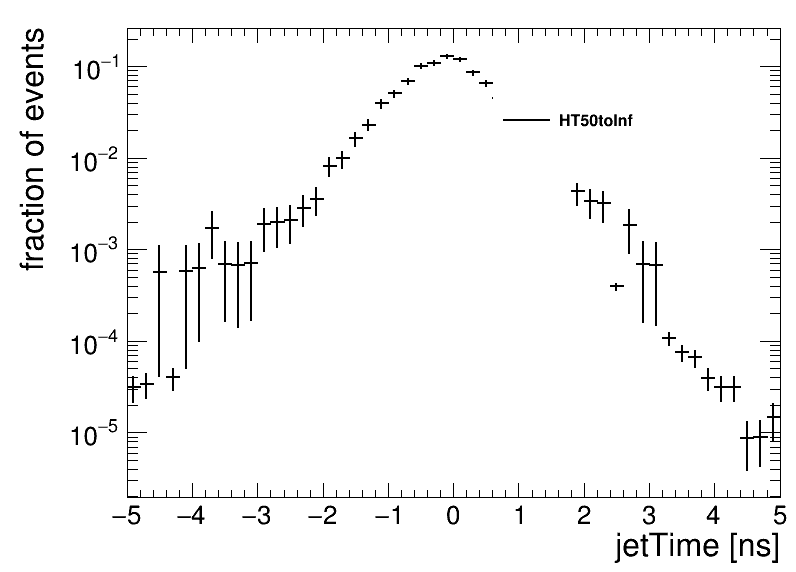

In [4]:
# plot subleading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

jetTime = tree['jetTime'].array()
weight = tree['weight'].array()
t = jetTime[:,1]
ht1 = create_TH1D( t, axis_title=['jetTime [ns]', 'fraction of events'], name=HT, binning=[50,-5,5],weights = weight)
ht1.SetLineColor(std_color_list[i])
ht1.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht1,HT)
leg.SetBorderSize(0)

ht1.DrawNormalized('')
  
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetTime_subleading.png')
c.SaveAs(out_dir+'JetTime_subleading.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT50toInf (Potential memory leak).
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/JetTime_all.png has been created
Info in <TCanvas::Print>: pdf file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/JetTime_all.pdf has been created


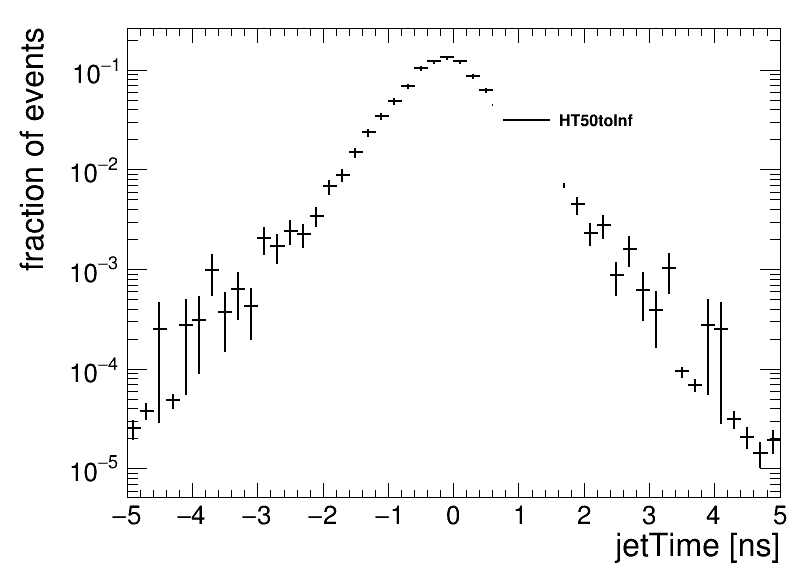

In [5]:
# plot all jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

jetTime = tree['jetTime'].array()
sizes = [len(x) for x in jetTime]
t = jetTime.flatten()
flat_weight = []
for j, (n, val) in enumerate(zip(sizes, weight)):
    #print n
    #print val
    #print n*[val]
    flat_weight += n*[val]
    #print flat_weight[k]
flat_weight = np.array(flat_weight)
ht = create_TH1D( t, axis_title=['jetTime [ns]', 'fraction of events'], name=HT, binning=[50,-5,5], weights = flat_weight)
ht.SetLineColor(std_color_list[i])
ht.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht,HT)
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
 
ht.DrawNormalized('')
 
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetTime_all.png')
c.SaveAs(out_dir+'JetTime_all.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/JetTime_leading_subleading.png has been created
Info in <TCanvas::Print>: pdf file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/JetTime_leading_subleading.pdf has been created


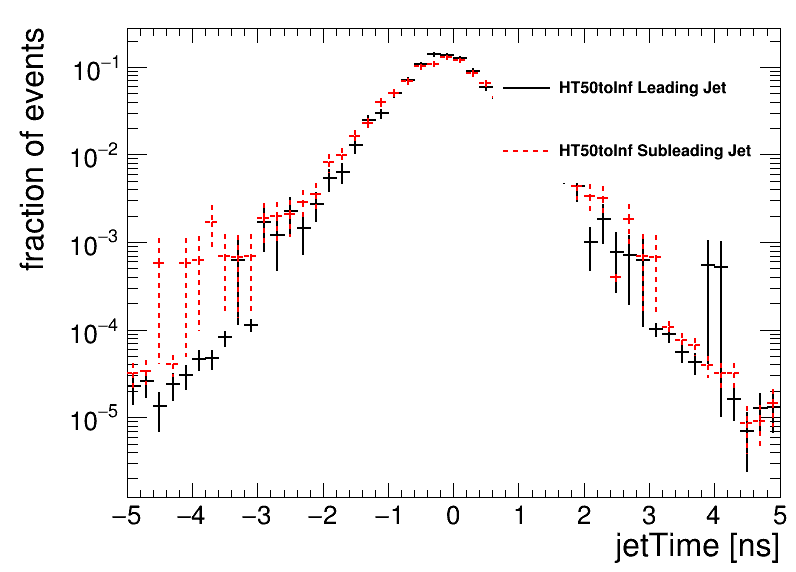

In [6]:
# plot leading n subleading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

 
ht0.SetLineStyle(1)
ht0.SetLineColor(std_color_list[i])
ht0.SetMarkerColor(std_color_list[i])

ht1.SetLineStyle(7)
ht1.SetLineColor(std_color_list[i+1])
ht1.SetMarkerColor(std_color_list[i+1])


leg.AddEntry(ht0,HT+' Leading Jet')
leg.AddEntry(ht1,HT+' Subleading Jet')
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
ht0.DrawNormalized('')
ht1.DrawNormalized('same')
 
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetTime_leading_subleading.png')
c.SaveAs(out_dir+'JetTime_leading_subleading.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/JetTime_leading_subleading_all.png has been created
Info in <TCanvas::Print>: pdf file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/JetTime_leading_subleading_all.pdf has been created


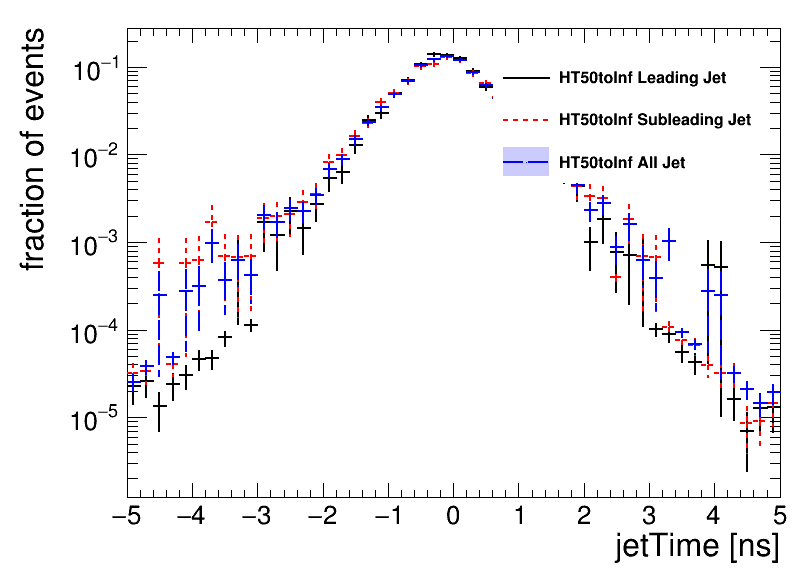

In [7]:
# plot leading n subleading jet time
c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0




ht0.SetLineStyle(1)
ht0.SetLineColor(std_color_list[i])
ht0.SetMarkerColor(std_color_list[i])

ht1.SetLineStyle(7)
ht1.SetLineColor(std_color_list[i+1])
ht1.SetMarkerColor(std_color_list[i+1])

ht.SetLineStyle(9)
ht.SetLineColor(std_color_list[i+2])
ht.SetFillColorAlpha(std_color_list[i+2],0.2)
ht.SetMarkerColor(std_color_list[i+2])


leg.AddEntry(ht0,HT+' Leading Jet')
leg.AddEntry(ht1,HT+' Subleading Jet')
leg.AddEntry(ht,HT+' All Jet')
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
ht0.DrawNormalized('')
ht1.DrawNormalized('same')
ht.DrawNormalized('same')
 
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetTime_leading_subleading_all.png')
c.SaveAs(out_dir+'JetTime_leading_subleading_all.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT50toInf (Potential memory leak).
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/JetPt_leading.png has been created
Info in <TCanvas::Print>: pdf file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/JetPt_leading.pdf has been created


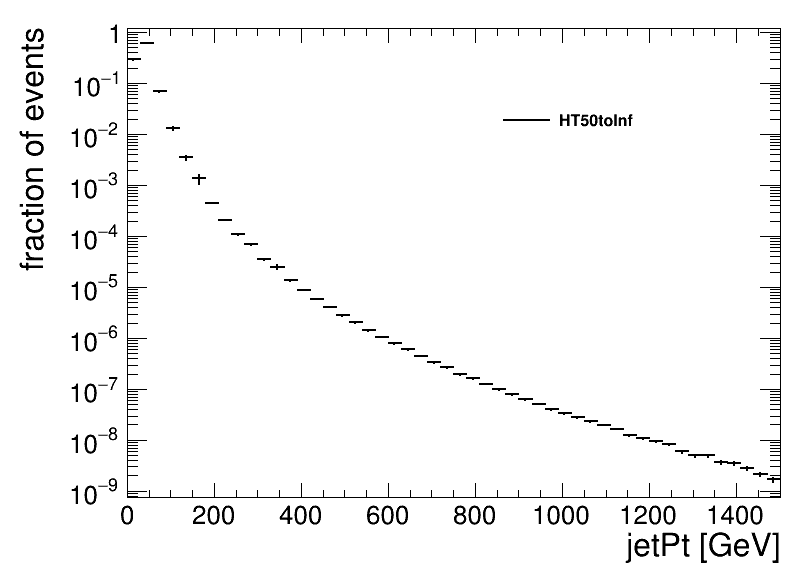

In [8]:
# plot leading jet pt
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


jetTime = tree['jetTime'].array()
jetPt = tree['jetPt'].array()
pt = jetPt[:,0]
h0 = create_TH1D( pt, axis_title=['jetPt [GeV]', 'fraction of events'], name=HT, binning=[50,0,1500], weights = weight)
h0.SetLineColor(std_color_list[i])
h0.SetMarkerColor(std_color_list[i])


leg.AddEntry(h0,HT)
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
h0.DrawNormalized('')

leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetPt_leading.png')
c.SaveAs(out_dir+'JetPt_leading.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT50toInf (Potential memory leak).
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/JetPt_subleading.png has been created
Info in <TCanvas::Print>: pdf file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/JetPt_subleading.pdf has been created


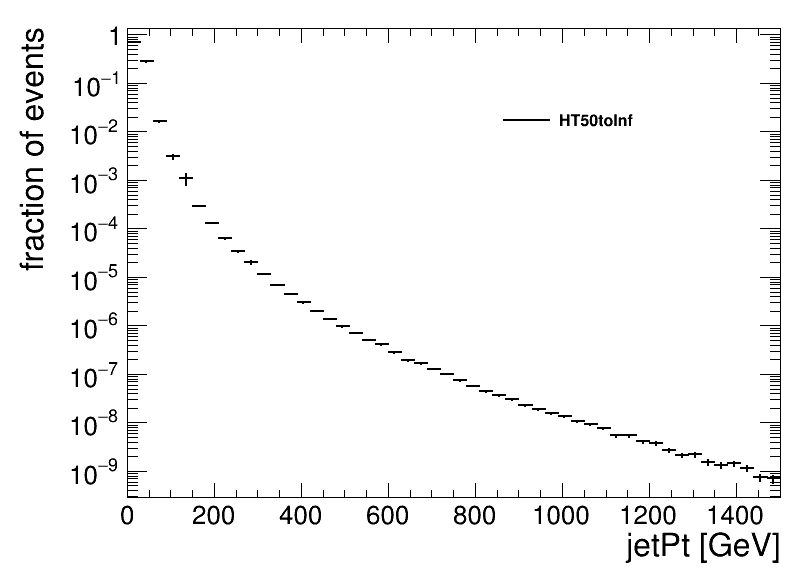

In [9]:
# plot subleading jet pt
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


 
jetTime = tree['jetTime'].array()
jetPt = tree['jetPt'].array()
pt = jetPt[:,1]
h1 = create_TH1D( pt, axis_title=['jetPt [GeV]', 'fraction of events'], name=HT, binning=[50,0,1500], weights =weight)
h1.SetLineColor(std_color_list[i])
h1.SetMarkerColor(std_color_list[i])


leg.AddEntry(h1,HT)
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
h1.DrawNormalized('')
 
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetPt_subleading.png')
c.SaveAs(out_dir+'JetPt_subleading.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/JetPt_leading_subleading.png has been created
Info in <TCanvas::Print>: pdf file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/JetPt_leading_subleading.pdf has been created


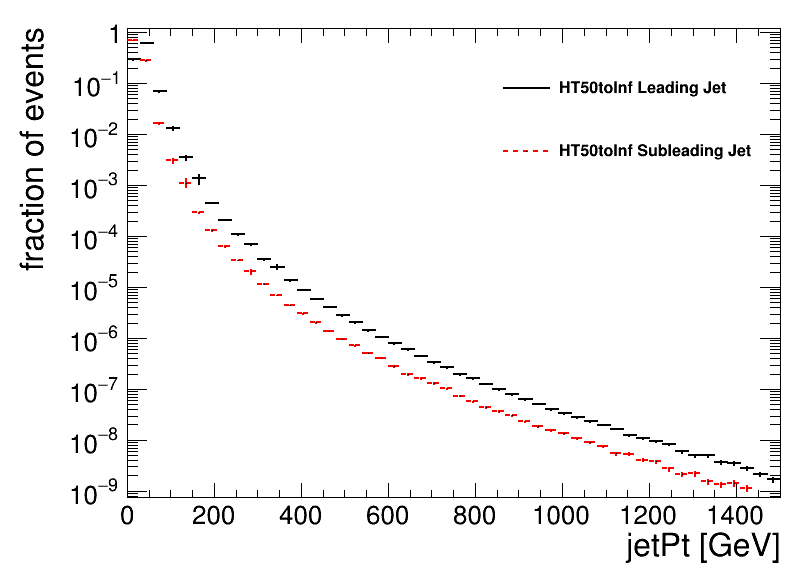

In [10]:
# plot leading n subleading jet pt
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


h0.SetLineStyle(1)
h0.SetLineColor(std_color_list[i])
h0.SetMarkerColor(std_color_list[i])

h1.SetLineStyle(7)
h1.SetLineColor(std_color_list[i+1])
h1.SetMarkerColor(std_color_list[i])


#leg.AddEntry(h0[k],k+' Leading Jet')
#leg.AddEntry(h1[k],k+' Subleading Jet')
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
h0.DrawNormalized('')
h1.DrawNormalized('same')
leg.AddEntry(h0,HT+' Leading Jet')
leg.AddEntry(h1,HT+' Subleading Jet')
 
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetPt_leading_subleading.png')
c.SaveAs(out_dir+'JetPt_leading_subleading.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT50toInf (Potential memory leak).
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/JetPt_all.png has been created
Info in <TCanvas::Print>: pdf file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/JetPt_all.pdf has been created


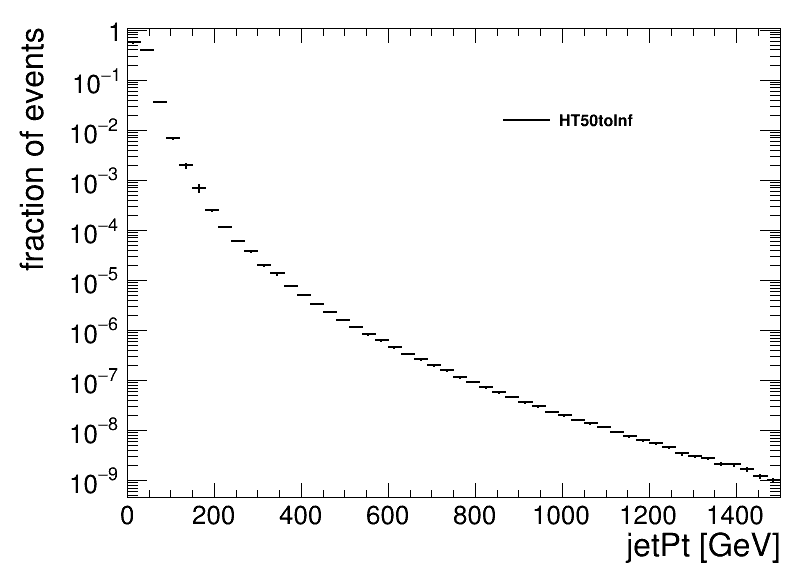

In [11]:
 # plot subleading jet pt
c = rt.TCanvas('c','c', 800, 600)
hpt = {}
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


jetTime = tree['jetTime'].array()
jetPt = tree['jetPt'].array()
pt = jetPt.flatten()
hpt = create_TH1D( pt, axis_title=['jetPt [GeV]', 'fraction of events'], name=HT, binning=[50,0,1500], weights = flat_weight)
hpt.SetLineColor(std_color_list[i])
hpt.SetMarkerColor(std_color_list[i])


leg.AddEntry(hpt,HT)
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)

hpt.DrawNormalized('')

leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetPt_all.png')
c.SaveAs(out_dir+'JetPt_all.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/JetPt_leading_subleading_all.png has been created
Info in <TCanvas::Print>: pdf file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/JetPt_leading_subleading_all.pdf has been created


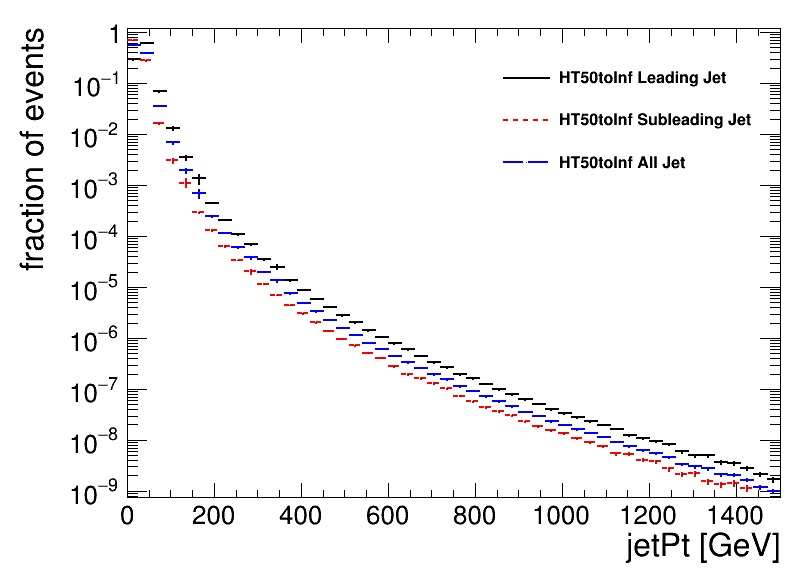

In [12]:
# plot leading n subleading n all jet pt
 
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


h0.SetLineStyle(1)
h0.SetLineColor(std_color_list[i])
h0.SetMarkerColor(std_color_list[i])

h1.SetLineStyle(7)
h1.SetLineColor(std_color_list[i+1])
h1.SetMarkerColor(std_color_list[i])

hpt.SetLineStyle(9)
hpt.SetLineColor(std_color_list[i+2])
hpt.SetMarkerColor(std_color_list[2])


#leg.AddEntry(h0[k],k+' Leading Jet')
#leg.AddEntry(h1[k],k+' Subleading Jet')
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
h0.DrawNormalized('')
h1.DrawNormalized('same')
hpt.DrawNormalized('same')
leg.AddEntry(h0,HT+' Leading Jet')
leg.AddEntry(h1,HT+' Subleading Jet')
leg.AddEntry(hpt,HT+' All Jet')
 
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetPt_leading_subleading_all.png')
c.SaveAs(out_dir+'JetPt_leading_subleading_all.pdf') 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/JetPt_leading_subleading_all_small.png has been created
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/JetPt_leading_subleading_all_small.png has been created


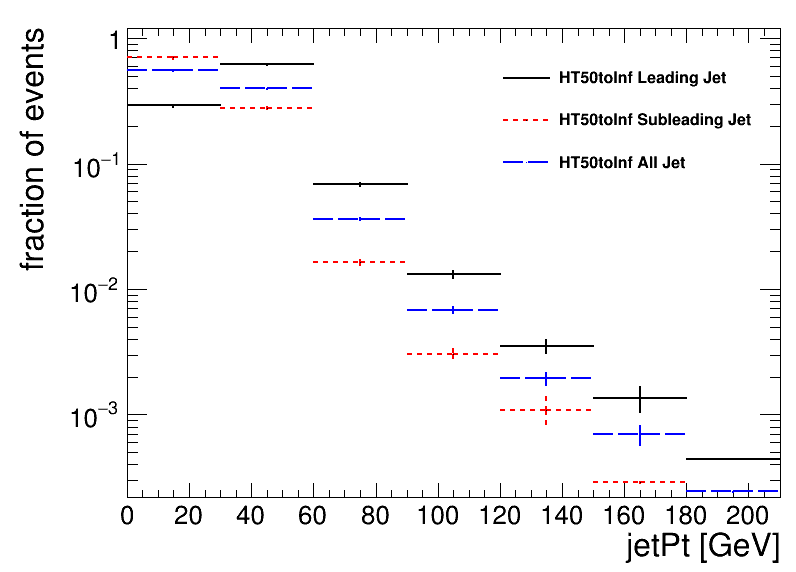

In [13]:

# plot leading n subleading n all jet pt
 
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


h0.SetLineStyle(1)
h0.SetLineColor(std_color_list[i])
h0.SetMarkerColor(std_color_list[i])

h1.SetLineStyle(7)
h1.SetLineColor(std_color_list[i+1])
h1.SetMarkerColor(std_color_list[i])

hpt.SetLineStyle(9)
hpt.SetLineColor(std_color_list[i+2])
hpt.SetMarkerColor(std_color_list[2])


#leg.AddEntry(h0[k],k+' Leading Jet')
#leg.AddEntry(h1[k],k+' Subleading Jet')
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
h0.GetXaxis().SetRangeUser(0,200)
h0.DrawNormalized('')
h1.DrawNormalized('same')
hpt.DrawNormalized('same')
leg.AddEntry(h0,HT+' Leading Jet')
leg.AddEntry(h1,HT+' Subleading Jet')
leg.AddEntry(hpt,HT+' All Jet')
 
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetPt_leading_subleading_all_small.png')
c.SaveAs(out_dir+'JetPt_leading_subleading_all_small.png')
 

 

In [14]:
 # plot jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


#pt ranges
pt_range = [[40,60],[60,80],[80,100]]
#time cuts


jetTime = tree['jetTime'].array()
jetPt = tree['jetPt'].array()
#print len(jetTime)
t = jetTime.flatten()
pt = jetPt.flatten()
#test cut
#cut = 'pt>20'
cutted_t = t[pt>20]
cut_weight = flat_weight[pt>20]
print t.shape, cutted_t.shape, cutted_t[cutted_t>1].shape
#cutted_t = np.logical_and(pt>-20, t>-1)
#count = np.count_nonzero(cutted_met) 
#print count
#print len(t)

(2220768,) (2220767,) (55945,)


/home/maojiajing/.local/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [ ]:
 # plot jet time
#pt ranges
#pt_range = [[60,80],[80,100]]
pt_range = [[80,100],[60,80],[40,60]]
#time cuts
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
#print len(t_cuts)

jetTime = tree['jetTime'].array()
jetPt = tree['jetPt'].array()
weight = tree['weight'].array()
# print 'Time',jetTime[:3]
# print 'Pt',jetPt[:3]
# print 'Weight',weight[:3]

jetTime_v = jetTime[np.logical_not(np.isnan(jetTime))]
jetPt_v = jetPt[np.logical_not(np.isnan(jetTime))]
#weight_v = weight[np.logical_not(np.isnan(jetTime))]
# print 'Time',jetTime_v[:3]
# print 'Pt',jetPt_v[:3]
#print 'Weight',weight_v[:3]

flat_weight_v = []
sizes = [len(x) for x in jetTime_v]
for j, (n, val) in enumerate(zip(sizes, weight)):
#         print j, n
#         print val
#         print n*[val]
        flat_weight_v += n*[val]
#         print flat_weight_v
#         if j>4 : 
#             break
flat_weight_v = np.array(flat_weight_v)

t_v = jetTime_v.flatten()
pt_v = jetPt_v.flatten()
#print 'Valid ones',t_v.shape, pt_v.shape, flat_weight_v.shape
#print 'Inclusive',t.shape, pt.shape, flat_weight.shape


#test cut
#cut = 'pt>20'
#cutted_t = t[pt>40]
#cut_weight = flat_weight[pt>20]
#print t.shape, cutted_t.shape, cutted_t[cutted_t>1].shape
 
Power_rej = {}
    
for m,n in enumerate(pt_range):
    #print m,n, n[0], n[1]
    ptcut_string = np.logical_and( pt_v > n[0], pt_v < n[1])
    ptcutted_t_v = t_v[ptcut_string]
    #print t_v.shape, t_v[np.logical_and(pt_v>n[0],pt_v<n[1])].shape, ptcutted_t_v.shape 
    #print 'pt range = [',n[0],',',n[1],'] GeV, after pt cut ',ptcutted_t_v.shape
    Ntotal = ptcutted_t_v.shape[0]
    #print Ntotal
    Power_rej[m] = []
    for p, q in enumerate(t_cuts):
        #print p, q
        tcut_string = np.logical_and(ptcut_string,t_v > q)
        #ptcutted_t_v = ptcutted_t_v.flatten()
        cutted_t_v =  t_v[tcut_string]
        #cutted_t_v = cutted_t_v.flatten()
        Nsel = cutted_t_v.shape[0]
        Nrej = 1.*Ntotal - 1.*Nsel
        Prej = 1.0*Ntotal/Nsel
        #Prej = Ntotal/Nrej
        #print 'after time cut > ',q,' ns ',cutted_t_v.shape, ', rejection power = ', Prej
        Power_rej[m] += [Prej]
        #print Power_rej[m]
        #, t_v[np.logical_and(np.logical_and( pt_v > n[0], pt_v < n[1]),t_cuts > q)].shape
    #Power_rej[m] = np.array(Power_rej[m]) 
    #print 'Rejection power',Power_rej[m]
    #print Power_rej[m].shape
        

#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.68,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

hrej = {}

for m,n in enumerate(pt_range):
#     if i==1 :

    pt_string = 'pt in [' + str(n[0]) + ', ' + str(n[1]) + '] GeV'
    name_string = 'pt_' + str(n[0]) + '_' + str(n[1])  
    print pt_string
    power = Power_rej[m]
    print power
    num = len(Power_rej[m])
    #print num, t_cuts, power
    t_cuts = np.array(t_cuts) 
    power = np.array(Power_rej[m]) 
    #print num, t_cuts, power
    hrej[m] = rt.TGraph(num , t_cuts, power)

    #print num, t_cuts, power
    hrej[m].SetLineColor(std_color_list[i])
    hrej[m].SetMarkerColor(std_color_list[i])
    hrej[m].SetMarkerStyle(22+i)
#     hrej[m].SetMarkerSize(2)


    leg.AddEntry(hrej[m],pt_string)
    leg.SetBorderSize(0)
        #hrej[m].GetYaxis().SetRangeUser(0,1000)

    if i==0 :
        #hrej[m].GetYaxis().SetRangeUser(0,1000)
        hrej[m].SetTitle( 'Rejection Power' )
        hrej[m].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        hrej[m].GetYaxis().SetRangeUser(0,1000)
        hrej[m].GetYaxis().SetTitle( 'Rejection Power' )
        hrej[m].Draw('APL')
    else:
        print i
        hrej[m].Draw('PLsame')
        
    i+=1

leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_PtBins.png')
c.SaveAs(out_dir+'RejectionPower_PtBins.pdf')


[4.2758566e-06 1.0127239e-05 1.1433644e-04 1.9260001e-04 5.0959305e-04
 6.3736360e-03 3.2338642e-02 3.6736554e-01 5.9467010e+01]
unique weights after pt cut [4.2758566e-06 1.0127239e-05 1.1433644e-04 1.9260001e-04 5.0959305e-04
 6.3736360e-03 3.2338642e-02 3.6736554e-01 5.9467010e+01]
113479 3111.6904
[1.0001762751302232, 1.0004055257288444, 1.0008908253805853, 1.002934235993884, 1.0247521176109375, 1.0527394845724252, 1.1245008175196949, 1.296710203055546, 1.6938681075917246, 2.5981408979554454, 4.732827292822288, 9.724826463278772, 20.36959253275893, 38.90263969832019, 68.23752254960914, 383.375, 1830.3064516129032, 4933.869565217391, 7565.266666666666]
[1.0000572000010985, 1.0002761740437993, 1.0006689977822814, 1.0019977874339077, 1.0212320053254285, 1.0438173715735712, 1.100230137478225, 1.316981137144453, 1.7781237008122277, 2.626717889670497, 4.7967247272872, 9.523876739412211, 16.06480127101847, 41.09020803848051, 71.69850082974713, 348.95565548568385, 1559.5974220241656, 4850.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/RejectionPower_w_PtBins.png has been created
Info in <TCanvas::Print>: pdf file /home/maojiajing/cernbox/www/Phase2L1/JetTiming0503/RejectionPower_w_PtBins.pdf has been created


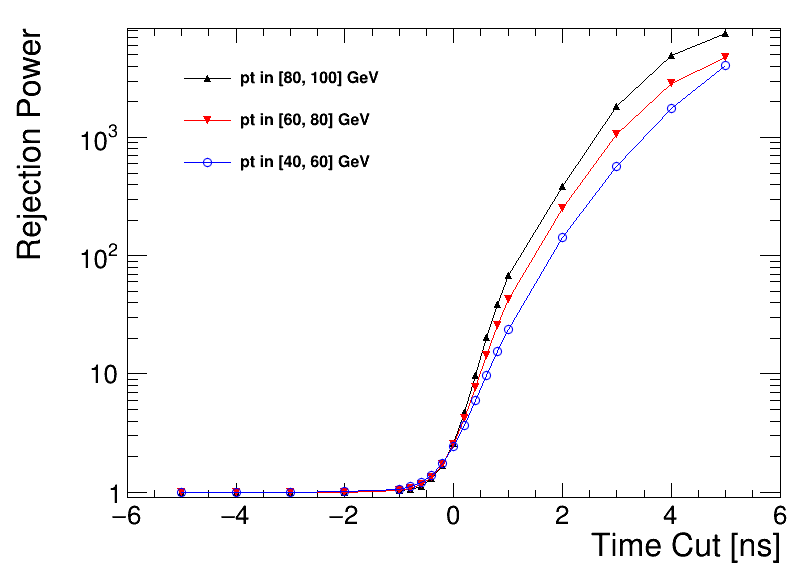

In [15]:
 # plot jet time rejection power w/ weight
#pt ranges
#pt_range = [[60,80],[80,100]]
pt_range = [[80,100],[60,80],[40,60]]
#time cuts
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
#print len(t_cuts)

jetTime = tree['jetTime'].array()
jetPt = tree['jetPt'].array()
weight = tree['weight'].array()
print np.unique(weight)
# print 'Time',jetTime[:3]
# print 'Pt',jetPt[:3]
# print 'Weight',weight[:3]

jetTime_v = jetTime[np.logical_not(np.isnan(jetTime))]
jetPt_v = jetPt[np.logical_not(np.isnan(jetTime))]
#weight_v = weight[np.logical_not(np.isnan(jetTime))]
# print 'Time',jetTime_v[:3]
# print 'Pt',jetPt_v[:3]
#print 'Weight',weight_v[:3]

flat_weight_v = []
sizes = [len(x) for x in jetTime_v]
for j, (n, val) in enumerate(zip(sizes, weight)):
#         print j, n
#         print val
#         print n*[val]
        flat_weight_v += n*[val]
#         print flat_weight_v
#         if j>4 : 
#             break
flat_weight_v = np.array(flat_weight_v)

t_v = jetTime_v.flatten()
pt_v = jetPt_v.flatten()
#print 'Valid ones',t_v.shape, pt_v.shape, flat_weight_v.shape
#print 'Inclusive',t.shape, pt.shape, flat_weight.shape


#test cut
#cut = 'pt>20'
#cutted_t = t[pt>40]
#cut_weight = flat_weight[pt>20]
#print t.shape, cutted_t.shape, cutted_t[cutted_t>1].shape
 
Power_rej = {}
Power_rej_w = {}
    
for m,n in enumerate(pt_range):
    #print m,n, n[0], n[1]
    ptcut_string = np.logical_and( pt_v > n[0], pt_v < n[1])
    ptcutted_t_v = t_v[ptcut_string]
    ptcutted_w_v = flat_weight_v[ptcut_string]
    #print t_v.shape, t_v[np.logical_and(pt_v>n[0],pt_v<n[1])].shape, ptcutted_t_v.shape 
    #print 'pt range = [',n[0],',',n[1],'] GeV, after pt cut ',ptcutted_t_v.shape
    Ntotal = ptcutted_t_v.shape[0]
    #Ntotal_w = ptcutted_w_v.shape[0]
    print 'unique weights after pt cut',np.unique(ptcutted_w_v)
    Ntotal_w = np.sum(ptcutted_w_v)
    print Ntotal, Ntotal_w
    Power_rej[m] = []
    Power_rej_w[m] = []
    for p, q in enumerate(t_cuts):
        #print p, q
        tcut_string = np.logical_and(ptcut_string,t_v > q)
        #ptcutted_t_v = ptcutted_t_v.flatten()
        cutted_t_v =  t_v[tcut_string]
        cutted_w_v =  flat_weight_v[tcut_string]
        #cutted_t_v = cutted_t_v.flatten()
        Nsel = cutted_t_v.shape[0]
        Nsel_w = np.sum(cutted_w_v)
        Nrej = 1.*Ntotal - 1.*Nsel
        Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
        Prej = 1.0*Ntotal/Nsel
        Prej_w = 1.0*Ntotal_w/Nsel_w
        #Prej = Ntotal/Nrej
        #print 'after time cut > ',q,' ns ',cutted_t_v.shape, ', rejection power = ', Prej
        Power_rej[m] += [Prej]
        Power_rej_w[m] += [Prej_w]
        #print Power_rej[m]
        #, t_v[np.logical_and(np.logical_and( pt_v > n[0], pt_v < n[1]),t_cuts > q)].shape
    #Power_rej[m] = np.array(Power_rej[m]) 
    #print 'Rejection power',Power_rej[m]
    #print Power_rej[m].shape
    print Power_rej[m]
    print Power_rej_w[m]
        

#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.68,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

hrej = {}

for m,n in enumerate(pt_range):
#     if i==1 :

    pt_string = 'pt in [' + str(n[0]) + ', ' + str(n[1]) + '] GeV'
    name_string = 'pt_' + str(n[0]) + '_' + str(n[1])  
    print pt_string
    power = Power_rej_w[m]
    #power = Power_rej[m]
    print power
    num = len(Power_rej[m])
    #print num, t_cuts, power
    t_cuts = np.array(t_cuts) 
    power = np.array(Power_rej[m]) 
    #print num, t_cuts, power
    hrej[m] = rt.TGraph(num , t_cuts, power)

    #print num, t_cuts, power
    hrej[m].SetLineColor(std_color_list[i])
    hrej[m].SetMarkerColor(std_color_list[i])
    hrej[m].SetMarkerStyle(22+i)
#     hrej[m].SetMarkerSize(2)


    leg.AddEntry(hrej[m],pt_string)
    leg.SetBorderSize(0)
        #hrej[m].GetYaxis().SetRangeUser(0,1000)

    if i==0 :
        #hrej[m].GetYaxis().SetRangeUser(0,1000)
        hrej[m].SetTitle( 'Rejection Power' )
        hrej[m].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        hrej[m].GetYaxis().SetRangeUser(0,10000)
        hrej[m].GetYaxis().SetTitle( 'Rejection Power' )
        hrej[m].Draw('ALP')
    else:
        print i
        hrej[m].Draw('LPsame')
        
    i+=1

leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_w_PtBins.png')
c.SaveAs(out_dir+'RejectionPower_w_PtBins.pdf')
